In [1]:
pip install biogeme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for biogeme: filename=biogeme-3.2.10-cp39-cp39-linux_x86_64.whl size=5565830 sha256=34c893acb71140ab41ff8ab15be84d85d6e7878424d873a329cdd124ef2ef23d
  Stored in directory: /root/.cache/pip/wheels/60/67/3a/4ee182d88582b8f73093f6825b0e9be6ef158e9cf02e33110e
Successfully built biogeme


In [ ]:
pip install aquirdturtle-collapsible-headings

In [2]:
# Import packages
from biogeme import tools
import pandas  as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.expressions as exp
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import biogeme.results as res
from biogeme.expressions import Beta, DefineVariable

pd.set_option('display.max_columns', 100)

In [3]:
import pkg_resources
try:
    version = pkg_resources.get_distribution("biogeme").version
    print("Biogeme version:", version)
except pkg_resources.DistributionNotFound:
    print("Biogeme is not installed")

Biogeme version: 3.2.10


In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [5]:
# Read the data
df = pd.read_csv('dataset.csv')


In [6]:
df['choice'] = df['travel_mode'].astype('category').cat.codes

for elem in set(df["purpose"]):
  df[elem] = np.where(df["purpose"]==elem,1,0)

for elem in set(df["fueltype"]):
  df[elem] = np.where(df["fueltype"]==elem,1,0)

for elem in set(df["faretype"]):
  df[elem] = np.where(df["faretype"]==elem,1,0)

In [7]:
df.drop('faretype',inplace=True,axis=1)
df.drop('purpose',inplace=True,axis=1)
df.drop('fueltype',inplace=True,axis=1)
df.drop('travel_mode',inplace=True,axis=1)

In [8]:
database = db.Database('dataset', df)
globals().update(database.variables)

### Model 1 Question 9 MNL


# Question 15

## Model 1

In [64]:
# Model 1
b_0_cycling = Beta('b_0_cycling',0,None,None,0)
b_0_driving = Beta('b_0_driving',0,None,None,0)
b_0_pt = Beta('b_0_pt',0,None,None,0)


b_1 = Beta('b_1',0,None,None,0)
b_2 = Beta('b_2',0,None,None,0)
b_3 = Beta('b_3',0,None,None,0)
b_4 = Beta('b_4',0,None,None,0)

x1=Beta('x1',0,None,None,0) 

V0 = b_0_cycling + b_3 * dur_cycling 
V1 = b_0_driving + b_3 * dur_driving  + b_2 * cost_driving_total
V2 = b_0_pt + b_3 * dur_pt_total + b_2 * cost_transit
V3 = b_3 * dur_walking

V_1 = {0:V0, 1:V1, 2:V2, 3:V3}
av_1 = {0:1, 1:1, 2:1, 3:1}

In [65]:
logprob = models.loglogit(V_1,av_1,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='question 9'
results_1 = biogeme.estimate()

In [66]:
# Print the estimated values
betas = results_1.getBetaValues()
for k,v in betas.items():
    print(f"{k:10}=\t{v:.3g}")

# Get the results in a pandas table
pandasResults = results_1.getEstimatedParameters()
print(pandasResults)

b_0_cycling=	-3.8
b_0_driving=	-1.22
b_0_pt    =	-0.501
b_2       =	-0.171
b_3       =	-5.31
                Value  Rob. Std err  Rob. t-test  Rob. p-value
b_0_cycling -3.798184      0.026404  -143.847197           0.0
b_0_driving -1.223662      0.019711   -62.080822           0.0
b_0_pt      -0.501475      0.013372   -37.501191           0.0
b_2         -0.171316      0.003359   -51.000922           0.0
b_3         -5.311210      0.049513  -107.269715           0.0


## Model 1

### 1st nested model 

In [88]:
database = db.Database('dataset', df)
globals().update(database.variables)

In [89]:
MU_1 = Beta('MU_1', 1, None, 10, 0)
MU_2 = Beta('MU_2', 1, None, 10, 0)


# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
Motorise = MU_1, [1, 2]
Non_motorise = MU_2, [0, 3]
nests = Motorise, Non_motorise

In [91]:
nested1 = models.lognested(V_1, av_1, nests, choice)
biogeme_nested = bio.BIOGEME (database, nested1)
biogeme_nested.modelName='question 9'
results_1_1= biogeme_nested.estimate()

In [92]:
# Estimate the parameters
pandasResults = results_1_1.getEstimatedParameters()
print(pandasResults)

                 Value  Rob. Std err  Rob. t-test  Rob. p-value
MU_1          0.345588      0.005680    60.841516           0.0
MU_2          0.674056      0.011614    58.040045           0.0
b_0_cycling  -5.773215      0.060279   -95.774255           0.0
b_0_driving  -3.464072      0.059366   -58.351533           0.0
b_0_pt       -2.233627      0.044187   -50.549941           0.0
b_2          -0.404890      0.007216   -56.110258           0.0
b_3         -10.154425      0.134864   -75.293790           0.0


In [93]:
corr = tools.calculate_correlation(
    nests, results_1_1
)
print(corr)

          0         1         2         3
0  1.000000  0.000000  0.000000 -1.200939
1  0.000000  1.000000 -7.373019  0.000000
2  0.000000 -7.373019  1.000000  0.000000
3 -1.200939  0.000000  0.000000  1.000000


In [94]:
NL1_model1 = results_1_1.data.logLike
print(NL1_model1)

-72768.39929827087


In [95]:
# Ratio test 
LL_NL=-72768.39929187277
LL_MNL=-74975.45789551057

chi = -2*(LL_MNL - LL_NL)

a = tools.likelihood_ratio_test((LL_NL,7), (LL_MNL,5), significance_level=0.05)

print(a)
print(chi)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=4414.117207275587, threshold=5.991464547107979)
4414.117207275587


Chisquare = 4414.117 for df =0. With this result we can reject the hypothesis that that the MNL is equally good at explaining the data as the NL model so we prefer the NL model. In the case of the Model 1 we would take this NL model because it has the best log likelihood compared to following NL models that are below (2nd and 3rd).
Furtheremore, this improvement is better than the one of the best loglikelihood of the NL models for the Model 2, so this NL model is going to be the one that we choose as the best fit of our data.

### 2nd nested model 

In [74]:
MU_1 = Beta('MU_1', 1, None, 10, 0)
MU_2 = Beta('MU_2', 1, None, 10, 0)

# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
indiv = MU_1, [0,1, 3]
rest = MU_2, [2]

nests_2 = indiv, rest

In [96]:
nested2 = models.lognested(V_1, av_1, nests_2, choice)
biogeme_nested = bio.BIOGEME (database, nested2)
biogeme_nested.modelName='question 9.2'
results_1_2 = biogeme_nested.estimate()

In [97]:
 # Estimate the parameters
pandasResults2 = results_1_2.getEstimatedParameters()
print(pandasResults2)

                Value   Rob. Std err    Rob. t-test  Rob. p-value
MU_1         1.295843   3.271422e-02   3.961099e+01           0.0
MU_2         0.674055  1.797693e+308  3.749554e-309           1.0
b_0_cycling -3.091013   6.661548e-02  -4.640082e+01           0.0
b_0_driving -1.070885   2.256786e-02  -4.745178e+01           0.0
b_0_pt      -0.548725   1.182804e-02  -4.639189e+01           0.0
b_2         -0.158112   3.366333e-03  -4.696872e+01           0.0
b_3         -4.745108   6.984132e-02  -6.794127e+01           0.0


In [98]:
corr = tools.calculate_correlation(
    nests_2, results_1_2
)
print(corr)

          0         1    2         3
0  1.000000  0.404481  0.0  0.404481
1  0.404481  1.000000  0.0  0.404481
2  0.000000  0.000000  1.0  0.000000
3  0.404481  0.404481  0.0  1.000000


In [99]:
NL2_model1 = results_1_2.data.logLike
print(NL2_model1)

-74885.48502082971


### 3rd nested model

In [79]:
MU_21 = Beta('MU_21', 1, None, 10, 0)
MU_22 = Beta('MU_22', 1, None, 10, 0)
MU_23 = Beta('MU_23', 1, None, 10, 0)

# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
ecological = MU_21, [0, 3]
PT = MU_22, [2]
drive = MU_23, [1]

nests_3 = ecological, PT,drive

In [100]:
nested3 = models.lognested(V_1, av_1, nests_3, choice)
biogeme_nested = bio.BIOGEME (database, nested3)
biogeme_nested.modelName='question 9.3'
results_1_3 = biogeme_nested.estimate()

In [101]:
# Estimate the parameters
pandasResults = results_1_3.getEstimatedParameters()
print(pandasResults)

                Value   Rob. Std err    Rob. t-test  Rob. p-value
MU_21        0.945701   1.728462e-02   5.471344e+01           0.0
MU_22        1.000000  1.797693e+308  5.562685e-309           1.0
MU_23        1.000000   6.369081e-17   1.570085e+16           0.0
b_0_cycling -3.891089   4.126404e-02  -9.429735e+01           0.0
b_0_driving -1.225501   1.976414e-02  -6.200629e+01           0.0
b_0_pt      -0.499957   1.345220e-02  -3.716544e+01           0.0
b_2         -0.172556   3.417707e-03  -5.048877e+01           0.0
b_3         -5.328377   4.954192e-02  -1.075529e+02           0.0


In [102]:
corr = tools.calculate_correlation(
    nests_3, results_1_3
)
print(corr)

         0    1    2        3
0  1.00000  0.0  0.0 -0.11813
1  0.00000  1.0  0.0  0.00000
2  0.00000  0.0  1.0  0.00000
3 -0.11813  0.0  0.0  1.00000


In [103]:
NL3_model1 = results_1_3.data.logLike
print(NL3_model1)

-74970.32496794095


## Model 2

In [104]:
#Model 2
from biogeme.expressions import Beta, DefineVariable, Derive, log

database = db.Database('dataset', df)
globals().update(database.variables)

b_0_cycling = Beta('b_0_cycling',0,None,None,0)
b_0_driving = Beta('b_0_driving',0,None,None,0)
b_0_pt = Beta('b_0_pt',0,None,None,0)

b_1 = Beta('b_1',0,None,None,0)
b_2 = Beta('b_2',0,None,None,0)
b_3 = Beta('b_3',0,None,None,0)
b_4 = Beta('b_4',0,None,None,0)
x1=Beta('x1',0,None,None,0) 

EPSILON = 0.01

V0 = b_0_cycling + b_3 * log(dur_cycling)
V1 = b_0_driving + b_3 * log(dur_driving)+ b_2 * log(cost_driving_total + EPSILON)
V2 = b_0_pt + b_3 * log(dur_pt_total) + b_2 * log(cost_transit + EPSILON)
V3 = b_3 * log(dur_walking)

V_2 = {0:V0, 1:V1, 2:V2, 3:V3}
av_2 = {0:1, 1:1, 2:1, 3:1}

In [87]:
logprob = models.loglogit(V_2,av_2,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='question 9.2'
results_2 = biogeme.estimate()

In [105]:
# Print the estimated values
betas = results_2.getBetaValues()
for k,v in betas.items():
    print(f"{k:10}=\t{v:.3g}")

# Get the results in a pandas table
pandasResults = results_2.getEstimatedParameters()
print(pandasResults)

b_0_cycling=	-5.38
b_0_driving=	-3.14
b_0_pt    =	-1.45
b_2       =	-0.0308
b_3       =	-3.2
                Value  Rob. Std err  Rob. t-test  Rob. p-value
b_0_cycling -5.381965      0.035986  -149.555316           0.0
b_0_driving -3.144940      0.030063  -104.612872           0.0
b_0_pt      -1.445711      0.018449   -78.363526           0.0
b_2         -0.030807      0.003303    -9.327213           0.0
b_3         -3.204735      0.022288  -143.787861           0.0


### 1st nested model

In [32]:
database = db.Database('dataset', df)
globals().update(database.variables)

In [106]:
MU_1 = Beta('MU_1', 1, None, 10, 0)
MU_2 = Beta('MU_2', 1, None, 10, 0)

# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
Motorise = MU_1, [1, 2]
Non_motorise = MU_2, [0, 3]
nests = Motorise, Non_motorise

In [107]:
nested1 = models.lognested(V_2, av_2, nests, choice)
biogeme_nested = bio.BIOGEME (database, nested1)
biogeme_nested.modelName='question 9.4'
results_2_1 = biogeme_nested.estimate()

In [108]:
# Estimate the parameters
pandasResults = results_2_1.getEstimatedParameters()
print(pandasResults)

                Value  Rob. Std err  Rob. t-test  Rob. p-value
MU_1         0.615769      0.009299    66.219850  0.000000e+00
MU_2         0.366444      0.018191    20.144663  0.000000e+00
b_0_cycling -9.723305      0.271100   -35.866113  0.000000e+00
b_0_driving -4.570654      0.064519   -70.842321  0.000000e+00
b_0_pt      -2.301311      0.044114   -52.167500  0.000000e+00
b_2         -0.028190      0.004603    -6.124240  9.111731e-10
b_3         -4.323597      0.043531   -99.321934  0.000000e+00


In [109]:
corr = tools.calculate_correlation(
    nests, results_2_1
)
print(corr)

          0         1         2         3
0  1.000000  0.000000  0.000000 -6.447046
1  0.000000  1.000000 -1.637328  0.000000
2  0.000000 -1.637328  1.000000  0.000000
3 -6.447046  0.000000  0.000000  1.000000


In [110]:
NL1_model1 = results_2_1.data.logLike
print(NL1_model1)

-77414.01132258045


In [111]:
# Ratio test 
LL_NL=-77414.0111245264
LL_MNL=-78081.10284920769

chi = -2*(LL_MNL - LL_NL)

a = tools.likelihood_ratio_test((LL_NL,7), (LL_MNL,5), significance_level=0.05)

print(a)
print(chi)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=1334.1834493625793, threshold=5.991464547107979)
1334.1834493625793


### 2nd nested model

In [112]:
MU_1 = Beta('MU_1', 1, None, 10, 0)
MU_2 = Beta('MU_2', 1, None, 10, 0)

# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
indiv = MU_1, [0,1, 3]
rest = MU_2, [ 2]

nests_2 = indiv, rest

In [113]:
nested2 = models.lognested(V_2, av_2, nests_2, choice)
biogeme_nested = bio.BIOGEME (database, nested2)
biogeme_nested.modelName='question 9.5'
results_2_2 = biogeme_nested.estimate()

In [114]:
# Estimate the parameters
pandasResults2 = results_2_2.getEstimatedParameters()
print(pandasResults2)

                Value  Rob. Std err  Rob. t-test  Rob. p-value
MU_1         1.180009      0.018845    62.615039      0.000000
MU_2         0.537902      0.018100    29.718904      0.000000
b_0_cycling -7.466573      0.159234   -46.890594      0.000000
b_0_driving -3.244856      0.033746   -96.156411      0.000000
b_0_pt      -1.641061      0.019857   -82.645377      0.000000
b_2         -0.002661      0.003857    -0.689712      0.490375
b_3         -3.206712      0.030127  -106.441313      0.000000


In [115]:
corr = tools.calculate_correlation(
    nests_2, results_2_2
)
print(corr)

          0         1         2         3
0  1.000000  0.000000 -2.456162  0.000000
1  0.000000  1.000000  0.000000  0.281827
2 -2.456162  0.000000  1.000000  0.000000
3  0.000000  0.281827  0.000000  1.000000


In [116]:
NL2_model1 = results_2_2.data.logLike
print(NL2_model1)

-77705.90655531327


### 3rd nested model

In [117]:
MU_21 = Beta('MU_21', 1, None, 10, 0)
MU_22 = Beta('MU_22', 1, None, 10, 0)
MU_23 = Beta('MU_23', 1, None, 10, 0)

# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
ecological = MU_21, [0, 3]
PT = MU_22, [2]
drive = MU_23, [1]

nests_3 = ecological, PT,drive

In [119]:
nested3 = models.lognested(V_2, av_2, nests_3, choice)
biogeme_nested = bio.BIOGEME (database, nested3)
biogeme_nested.modelName='question 9.6'
results_2_3 = biogeme_nested.estimate()

In [120]:
# Estimate the parameters
pandasResults = results_2_3.getEstimatedParameters()
print(pandasResults)

                Value   Rob. Std err    Rob. t-test  Rob. p-value
MU_21        0.474963   2.384080e-02   1.992229e+01           0.0
MU_22        1.000000  1.797693e+308  5.562685e-309           1.0
MU_23        1.000000  1.797693e+308  5.562685e-309           1.0
b_0_cycling -7.442407   2.052914e-01  -3.625289e+01           0.0
b_0_driving -3.065034   3.369197e-02  -9.097224e+01           0.0
b_0_pt      -1.327074   2.376634e-02  -5.583837e+01           0.0
b_2         -0.031265   3.329917e-03  -9.389235e+00           0.0
b_3         -3.269705   2.311371e-02  -1.414617e+02           0.0


In [121]:
corr = tools.calculate_correlation(
    nests_3, results_2_3
)
print(corr)

          0    1    2         3
0  1.000000  0.0  0.0 -3.432819
1  0.000000  1.0  0.0  0.000000
2  0.000000  0.0  1.0  0.000000
3 -3.432819  0.0  0.0  1.000000


In [122]:
NL3_model1 = results_2_3.data.logLike
print(NL3_model1)

-77957.19899058618


## QUESTION 17

## Model 1 - Nested model 1 

In [129]:
#Calculation of probabilities
prob_0 = models.nested(V_1, av_1, nests, 0)
prob_1 = models.nested(V_1, av_1, nests, 1)
prob_2 = models.nested(V_1, av_1, nests, 2)
prob_3 = models.nested(V_1, av_1, nests, 3)

elasdir_0_time = Derive(prob_0,'dur_cycling') * dur_cycling / prob_0 
elasdir_1_time = Derive(prob_1,'dur_driving') * dur_driving / prob_1 
elasdir_2_time = Derive(prob_2,'dur_pt_total') * dur_pt_total / prob_2 
elasdir_3_time = Derive(prob_3,'dur_walking') * dur_walking / prob_3 
elasdir_1_cost = Derive(prob_1,'cost_driving_total') * cost_driving_total / prob_1 
elasdir_2_cost = Derive(prob_2,'cost_transit') * cost_transit / prob_2 

elastcross_1_time = Derive(prob_1,'dur_pt_total') * dur_pt_total / prob_1 
elastcross_2_time = Derive(prob_2,'dur_driving') * dur_driving / prob_2 
elastcross_1_cost = Derive(prob_1,'cost_transit') * cost_transit / prob_1 
elastcross_2_cost = Derive(prob_2,'cost_driving_total') * cost_driving_total / prob_2 

simulate_1_1 = {
    'prob.0': prob_0,
    'prob.1': prob_1,
    'prob.2': prob_2,
    'prob.3': prob_3,
    'elasdir_0_time': elasdir_0_time,
    'elasdir_1_time': elasdir_1_time,
    'elasdir_2_time': elasdir_2_time,
    'elasdir_3_time': elasdir_3_time,
    'elasdir_1_cost': elasdir_1_cost,
    'elasdir_2_cost': elasdir_2_cost,
    'elascross_1_time': elastcross_1_time,
    'elascross_2_time': elastcross_2_time,
    'elascross_1_cost': elastcross_1_cost,
    'elascross_2_cost': elastcross_2_cost
}

biosim = bio.BIOGEME(database, simulate_1_1)
biosim.modelName = 'model1_directelasticity'

# Perform the simulation
simresults_1_1 = biosim.simulate(results_1_1.getBetaValues())

In [130]:
# Average Elast for the population
avg_Elast_time_0 = sum(simresults_1_1['elasdir_0_time']*simresults_1_1['prob.0']/(simresults_1_1['prob.0'].sum()))
avg_Elast_time_1 = sum(simresults_1_1['elasdir_1_time']*simresults_1_1['prob.1']/(simresults_1_1['prob.1'].sum()))
avg_Elast_time_2 = sum(simresults_1_1['elasdir_2_time']*simresults_1_1['prob.2']/(simresults_1_1['prob.2'].sum()))
avg_Elast_time_3 = sum(simresults_1_1['elasdir_3_time']*simresults_1_1['prob.3']/(simresults_1_1['prob.3'].sum()))
avg_Elast_cost_1 = sum(simresults_1_1['elasdir_1_cost']*simresults_1_1['prob.1']/(simresults_1_1['prob.1'].sum()))
avg_Elast_cost_2 = sum(simresults_1_1['elasdir_2_cost']*simresults_1_1['prob.2']/(simresults_1_1['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 0 with respect to travel time: {avg_Elast_time_0:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel time: {avg_Elast_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time: {avg_Elast_time_2:.3f} \n'
f'Elasticity of the share of alternative 3 with respect to travel time: {avg_Elast_time_3:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost: {avg_Elast_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost: {avg_Elast_cost_2:.3f} \n')

# Average Elast for the population
avg_Elastcross_time_1 = sum(simresults_1_1['elascross_1_time']*simresults_1_1['prob.1']/(simresults_1_1['prob.1'].sum()))
avg_Elastcross_time_2 = sum(simresults_1_1['elascross_2_time']*simresults_1_1['prob.2']/(simresults_1_1['prob.2'].sum()))
avg_Elastcross_cost_1 = sum(simresults_1_1['elascross_1_cost']*simresults_1_1['prob.1']/(simresults_1_1['prob.1'].sum()))
avg_Elastcross_cost_2 = sum(simresults_1_1['elascross_2_cost']*simresults_1_1['prob.2']/(simresults_1_1['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 1 with respect to travel time of pt: {avg_Elastcross_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time of driving: {avg_Elastcross_time_2:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost of pt: {avg_Elastcross_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost driving: {avg_Elastcross_cost_2:.3f} \n')

Elasticity of the share of alternative 0 with respect to travel time: -2.400 
Elasticity of the share of alternative 1 with respect to travel time: -0.501 
Elasticity of the share of alternative 2 with respect to travel time: -1.034 
Elasticity of the share of alternative 3 with respect to travel time: -1.790 
Elasticity of the share of alternative 1 with respect to travel cost: -0.099 
Elasticity of the share of alternative 2 with respect to travel cost: -0.140 

Elasticity of the share of alternative 1 with respect to travel time of pt: 0.487 
Elasticity of the share of alternative 2 with respect to travel time of driving: 0.392 
Elasticity of the share of alternative 1 with respect to travel cost of pt: 0.056 
Elasticity of the share of alternative 2 with respect to travel cost driving: 0.075 



## Model 2 - Nested model 1 

In [132]:
#Calculation of probabilities
prob_0 = models.nested(V_2, av_2, nests, 0)
prob_1 = models.nested(V_2, av_2, nests, 1)
prob_2 = models.nested(V_2, av_2, nests, 2)
prob_3 = models.nested(V_2, av_2, nests, 3)

elasdir_0_time = Derive(prob_0,'dur_cycling') * dur_cycling / prob_0 
elasdir_1_time = Derive(prob_1,'dur_driving') * dur_driving / prob_1 
elasdir_2_time = Derive(prob_2,'dur_pt_total') * dur_pt_total / prob_2 
elasdir_3_time = Derive(prob_3,'dur_walking') * dur_walking / prob_3 
elasdir_1_cost = Derive(prob_1,'cost_driving_total') * cost_driving_total / prob_1 
elasdir_2_cost = Derive(prob_2,'cost_transit') * cost_transit / prob_2 

elastcross_1_time = Derive(prob_1,'dur_pt_total') * dur_pt_total / prob_1 
elastcross_2_time = Derive(prob_2,'dur_driving') * dur_driving / prob_2 
elastcross_1_cost = Derive(prob_1,'cost_transit') * cost_transit / prob_1 
elastcross_2_cost = Derive(prob_2,'cost_driving_total') * cost_driving_total / prob_2 

simulate_2_1 = {
    'prob.0': prob_0,
    'prob.1': prob_1,
    'prob.2': prob_2,
    'prob.3': prob_3,
    'elasdir_0_time': elasdir_0_time,
    'elasdir_1_time': elasdir_1_time,
    'elasdir_2_time': elasdir_2_time,
    'elasdir_3_time': elasdir_3_time,
    'elasdir_1_cost': elasdir_1_cost,
    'elasdir_2_cost': elasdir_2_cost,
    'elascross_1_time': elastcross_1_time,
    'elascross_2_time': elastcross_2_time,
    'elascross_1_cost': elastcross_1_cost,
    'elascross_2_cost': elastcross_2_cost
}

biosim = bio.BIOGEME(database, simulate_2_1)
biosim.modelName = 'model1_directelasticity'

# Perform the simulation
simresults_2_1 = biosim.simulate(results_2_1.getBetaValues())

In [133]:
# Average Elast for the population
avg_Elast_time_0 = sum(simresults_2_1['elasdir_0_time']*simresults_2_1['prob.0']/(simresults_2_1['prob.0'].sum()))
avg_Elast_time_1 = sum(simresults_2_1['elasdir_1_time']*simresults_2_1['prob.1']/(simresults_2_1['prob.1'].sum()))
avg_Elast_time_2 = sum(simresults_2_1['elasdir_2_time']*simresults_2_1['prob.2']/(simresults_2_1['prob.2'].sum()))
avg_Elast_time_3 = sum(simresults_2_1['elasdir_3_time']*simresults_2_1['prob.3']/(simresults_2_1['prob.3'].sum()))
avg_Elast_cost_1 = sum(simresults_2_1['elasdir_1_cost']*simresults_2_1['prob.1']/(simresults_2_1['prob.1'].sum()))
avg_Elast_cost_2 = sum(simresults_2_1['elasdir_2_cost']*simresults_2_1['prob.2']/(simresults_2_1['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 0 with respect to travel time: {avg_Elast_time_0:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel time: {avg_Elast_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time: {avg_Elast_time_2:.3f} \n'
f'Elasticity of the share of alternative 3 with respect to travel time: {avg_Elast_time_3:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost: {avg_Elast_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost: {avg_Elast_cost_2:.3f} \n')

# Average Elast for the population
avg_Elastcross_time_1 = sum(simresults_2_1['elascross_1_time']*simresults_2_1['prob.1']/(simresults_2_1['prob.1'].sum()))
avg_Elastcross_time_2 = sum(simresults_2_1['elascross_2_time']*simresults_2_1['prob.2']/(simresults_2_1['prob.2'].sum()))
avg_Elastcross_cost_1 = sum(simresults_2_1['elascross_1_cost']*simresults_2_1['prob.1']/(simresults_2_1['prob.1'].sum()))
avg_Elastcross_cost_2 = sum(simresults_2_1['elascross_2_cost']*simresults_2_1['prob.2']/(simresults_2_1['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 1 with respect to travel time of pt: {avg_Elastcross_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time of driving: {avg_Elastcross_time_2:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost of pt: {avg_Elastcross_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost driving: {avg_Elastcross_cost_2:.3f} \n')

Elasticity of the share of alternative 0 with respect to travel time: -1.775 
Elasticity of the share of alternative 1 with respect to travel time: -1.451 
Elasticity of the share of alternative 2 with respect to travel time: -1.504 
Elasticity of the share of alternative 3 with respect to travel time: -2.570 
Elasticity of the share of alternative 1 with respect to travel cost: -0.009 
Elasticity of the share of alternative 2 with respect to travel cost: -0.007 

Elasticity of the share of alternative 1 with respect to travel time of pt: 0.690 
Elasticity of the share of alternative 2 with respect to travel time of driving: 0.850 
Elasticity of the share of alternative 1 with respect to travel cost of pt: 0.003 
Elasticity of the share of alternative 2 with respect to travel cost driving: 0.005 



## Question 18

In [134]:
print(
    f"Standard deviation: {simresults_1_1['prob.2'].std()} \n"
    f"Min: {simresults_1_1['prob.2'].min()} \n"
    f"Max: {simresults_1_1['prob.2'].max()} \n"
    f"Median: {simresults_1_1['prob.2'].quantile(0.5)} \n"
    f"Percentile 10%: {simresults_1_1['prob.2'].quantile(0.1)} \n"
    f"Percentile 90%: {simresults_1_1['prob.2'].quantile(0.9)} \n"
)

Standard deviation: 0.17153935178156823 
Min: 0.0008497642676277352 
Max: 0.9900041738491124 
Median: 0.3219270079571191 
Percentile 10%: 0.17723244310213038 
Percentile 90%: 0.5680272620484765 



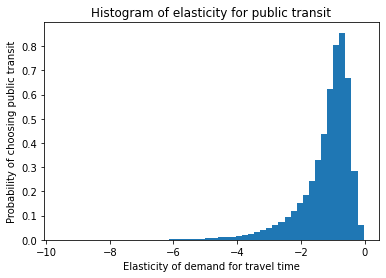

In [135]:
plt.hist(simresults_1_1['elasdir_2_time'], bins=50, density=True)
plt.xlabel('Elasticity of demand for travel time')
plt.ylabel('Probability of choosing public transit')
plt.title('Histogram of elasticity for public transit')
plt.show()

## Question 19

## Function 1

<function matplotlib.pyplot.show(close=None, block=None)>

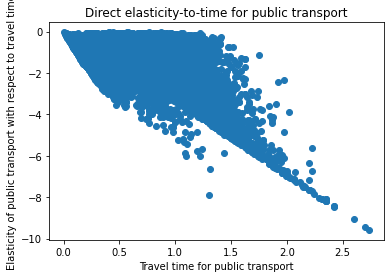

In [136]:
plt.scatter(df['dur_pt_total'],simresults_1_1['elasdir_2_time'])
plt.xlabel('Travel time for public transport')
plt.ylabel('Elasticity of public transport with respect to travel time')
plt.title('Direct elasticity-to-time for public transport')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

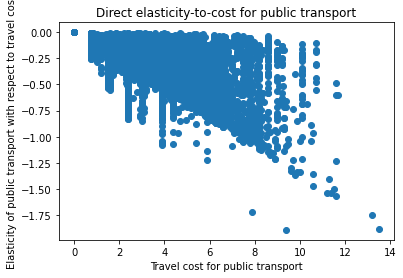

In [137]:
plt.scatter(df['cost_transit'],simresults_1_1['elasdir_2_cost'])
plt.xlabel('Travel cost for public transport')
plt.ylabel('Elasticity of public transport with respect to travel cost')
plt.title('Direct elasticity-to-cost for public transport')
plt.show

## Function 2

<function matplotlib.pyplot.show(close=None, block=None)>

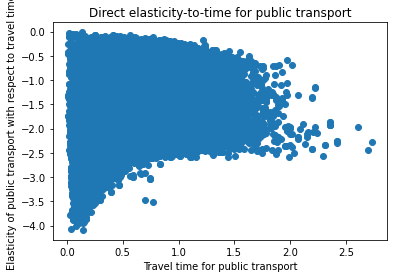

In [138]:
plt.scatter(df['dur_pt_total'],simresults_2_1['elasdir_2_time'])
plt.xlabel('Travel time for public transport')
plt.ylabel('Elasticity of public transport with respect to travel time')
plt.title('Direct elasticity-to-time for public transport')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

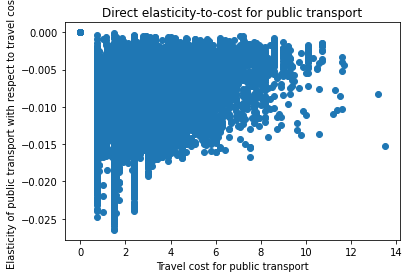

In [139]:
plt.scatter(df['cost_transit'],simresults_2_1['elasdir_2_cost'])
plt.xlabel('Travel cost for public transport')
plt.ylabel('Elasticity of public transport with respect to travel cost')
plt.title('Direct elasticity-to-cost for public transport')
plt.show